In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/home/vinod/Downloads/credits.csv')
data.head(5)

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [4]:
data.shape

(77213, 5)

In [5]:
data.describe()

,person_id
count,7.721300e+04
mean,4.994603e+05
std,6.128431e+05
min,7.000000e+00
25%,4.158400e+04
50%,1.829850e+05
75%,8.415570e+05
max,2.371585e+06


# Caluculate the actors and dicetors on the given data, so 94% is actor 5% is director.Then id column is not useful for our model then it will be droped 

In [6]:
data['role'].value_counts()/len(data)*100

ACTOR       94.142178
DIRECTOR     5.857822
Name: role, dtype: float64

In [7]:
data.drop(['id'],axis=1,inplace=True)

In [8]:
data.head()

,person_id,name,character,role
0,3748,Robert De Niro,Travis Bickle,ACTOR
1,14658,Jodie Foster,Iris Steensma,ACTOR
2,7064,Albert Brooks,Tom,ACTOR
3,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,Cybill Shepherd,Betsy,ACTOR


In [9]:
name=data['name'].value_counts()

In [10]:
name

Shah Rukh Khan         30
Anupam Kher            25
Boman Irani            25
Kareena Kapoor Khan    25
Takahiro Sakurai       22
                       ..
Jo Hong-woo             1
Cochin Haneefa          1
Susan Hamann            1
Kelis                   1
Lisa Jane Persky        1
Name: name, Length: 53687, dtype: int64

In [11]:
character=data['character'].value_counts()

In [12]:
character

Self                      1667
Himself                   1237
Herself                    444
Self (archive footage)     327
Dancer                     168
                          ... 
Glen Finch                   1
Diego Delgado                1
Elder Kettle (voice)         1
Ko Young-Sook                1
Mike McCann                  1
Name: character, Length: 47125, dtype: int64

In [13]:
new_data=data[['name','character','role']]

# To convert the categorical data to numerical data because our machine can't read categorical data, so i used labelencoder method to convert it

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()
categorical=new_data.apply(le.fit_transform)

In [16]:
categorical

,name,character,role
0,42350,43033,0
1,23120,18667,0
2,1323,42642,0
3,18599,26988,0
4,10617,4323,0
...,...,...,...
77208,37604,689,0
77209,30460,11339,0
77210,31111,19343,0
77211,35404,30968,0


In [17]:
categorical['role'].value_counts()/len(categorical)*100

0    94.142178
1     5.857822
Name: role, dtype: float64

# To drop the Categorical data from the dataset and and add the our numerical data to the dataframe

In [18]:
data.head()

,person_id,name,character,role
0,3748,Robert De Niro,Travis Bickle,ACTOR
1,14658,Jodie Foster,Iris Steensma,ACTOR
2,7064,Albert Brooks,Tom,ACTOR
3,3739,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,Cybill Shepherd,Betsy,ACTOR


In [19]:
data.drop(['name','character','role'],axis=1,inplace=True)

In [20]:
master_data=pd.concat([data,categorical],axis=1)

In [21]:
master_data.head()

,person_id,name,character,role
0,3748,42350,43033,0
1,14658,23120,18667,0
2,7064,1323,42642,0
3,3739,18599,26988,0
4,48933,10617,4323,0


# Diveded the dataset into train and test process using machine learning i used 20% data for testing and remain 20 data training

In [22]:
X=master_data.iloc[:,:-1]
y=master_data.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# This is classification problem so i used Decisiontreeclassifier and Randomtreeclassifier algorithms to detect the wether the preson actor or director

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree,export_text

In [26]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=20,splitter='best',random_state=102,min_samples_split=5,ccp_alpha=0.01)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=20,
                       min_samples_split=5, random_state=102)

[Text(0.5, 0.75, 'X[2] <= 47124.5\nentropy = 0.32\nsamples = 61770\nvalue = [58185, 3585]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 54091\nvalue = [54091, 0]'),
 Text(0.75, 0.25, 'entropy = 0.997\nsamples = 7679\nvalue = [4094, 3585]')]

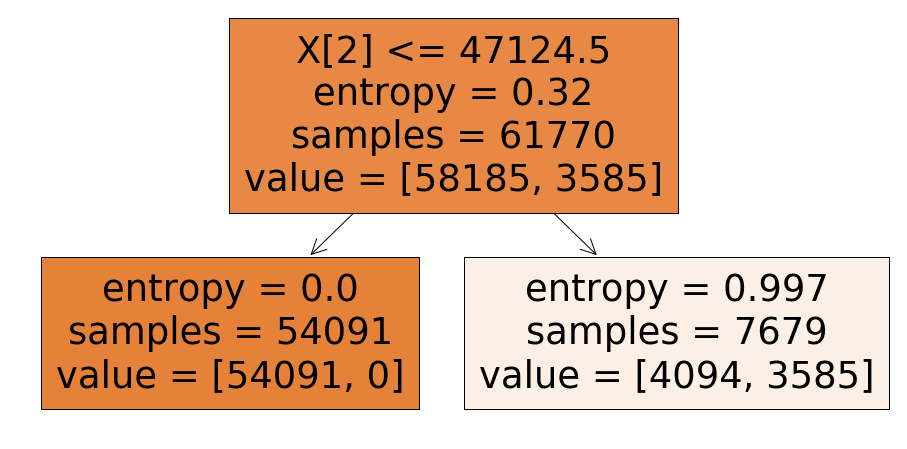

In [27]:
plt.figure(figsize=(16,8))
plot_tree(clf,filled=True)

In [28]:
pred=clf.predict(X_test)

# Let's check our model score. That's good our model score is 93% is good score

In [29]:
print("Model test score",clf.score(X_test,y_test))
print("Model train score",clf.score(X_train,y_train))

Model test score 0.9392605063782944
Model train score 0.9419621175327829


In [30]:
master_data.corr()

,person_id,name,character,role
person_id,1.000000,-0.002829,0.060041,-0.030060
name,-0.002829,1.000000,0.036961,0.019022
character,0.060041,0.036961,1.000000,0.346491
role,-0.030060,0.019022,0.346491,1.000000


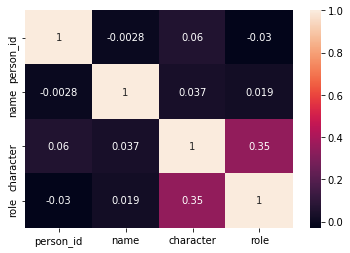

In [31]:
sns.heatmap(master_data.corr(),annot=True)

# Let's find the accuracy_score along with confusion matrix

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
print('The accuracy score of the Desiciontreeclassifier {:.4f}'.format(accuracy_score(y_test,pred)))

The accuracy score of the Desiciontreeclassifier 0.9393


In [34]:
confusion=confusion_matrix(y_test,pred)

In [35]:
confusion

array([[14505,     0],
       [  938,     0]])

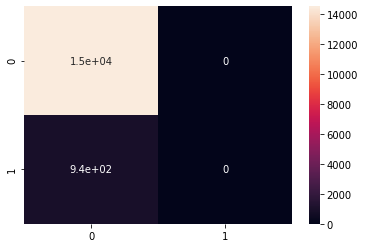

In [36]:
sns.heatmap(confusion,annot=True)

# Let's use the Randomfrosetclassier method to our model with the parameters

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1,random_state=105,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10,
                       n_jobs=-1, random_state=105)

# Let's find the model score.So our model is good with 94% test score . i think this algorithm must be fit the model

In [39]:
print("The test score",rfc.score(X_test,y_test))
print("the train score",rfc.score(X_train,y_train))

The test score 0.9476138056077187
the train score 0.9506880362635584


In [40]:
prediction=rfc.predict(X_test)

# Let's the fing the accuracy score and confusion matrix of the randomforestclassifier method

In [41]:
print("Accuracy score is Randomforestclassifier",accuracy_score(y_test,prediction))

Accuracy score is Randomforestclassifier 0.9476138056077187


In [42]:
matrix=confusion_matrix(y_test,prediction)

In [43]:
matrix

array([[14402,   103],
       [  706,   232]])

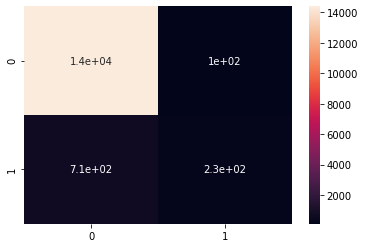

In [44]:
sns.heatmap(matrix,annot=True)

# Finally our model scores 

In [45]:
print("Model test score",clf.score(X_test,y_test))
print("Model train score",clf.score(X_train,y_train))
print("The test score",rfc.score(X_test,y_test))
print("the train score",rfc.score(X_train,y_train))

Model test score 0.9392605063782944
Model train score 0.9419621175327829
The test score 0.9476138056077187
the train score 0.9506880362635584
